Import necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

Generate synthetic binary classification data using numpy
Create a dataset of 100 samples with one feature

In [ ]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1) - 1  # Feature values between -1 and 1
y = (X[:, 0] > 0).astype(int)  # Class label: 1 if X > 0, else 0

Split the data into training and testing sets (80% training, 20% testing)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Fit Logistic Regression model using scikit-learn

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

Predict the class labels for the test data

In [ ]:
y_pred = log_reg.predict(X_test)

Predict the probabilities (used for evaluating the ROC-AUC score)

In [ ]:
y_prob = log_reg.predict_proba(X_test)[:, 1]  # Probability of the positive class (1)

Essential Metrics Calculation

Model parameters (intercept and coefficient)

In [ ]:
print("Intercept:", log_reg.intercept_)
print("Coefficient:", log_reg.coef_)

Intercept: [0.0997298]
Coefficient: [[3.8545131]]


Visualizing the decision boundary

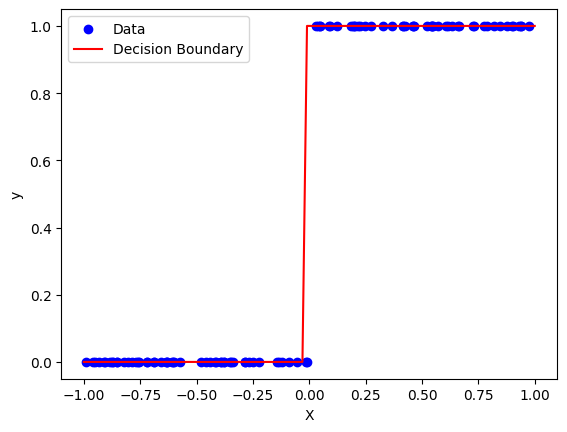

In [ ]:
plt.scatter(X, y, color='blue', label='Data')
x_boundary = np.linspace(-1, 1, 100)
y_boundary = log_reg.predict(x_boundary.reshape(-1, 1))
plt.plot(x_boundary, y_boundary, color='red', label='Decision Boundary')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Accuracy

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


Precision

In [ ]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 1.0


Recall

In [ ]:
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 1.0


F1 Score

In [ ]:
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 1.0


ROC-AUC (Area Under the Receiver Operating Characteristic Curve)

In [ ]:
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 1.0


Pseudo R-squared (McFadden's R2)

Maximum likelihood estimation is implicit in Logistic Regression, so we can use this to calculate pseudo R2

The McFadden's R² formula: 1 - (log likelihood of model / log likelihood of null model)

In [ ]:
log_likelihood_model = np.sum(y_test * np.log(y_prob) + (1 - y_test) * np.log(1 - y_prob))  # Log-likelihood of the fitted model
log_likelihood_null = np.sum(y_test * np.log(np.mean(y_test)) + (1 - y_test) * np.log(1 - np.mean(y_test)))  # Log-likelihood of the null model
pseudo_r2 = 1 - (log_likelihood_model / log_likelihood_null)
print("McFadden's Pseudo R-squared (R²):", pseudo_r2)

McFadden's Pseudo R-squared (R²): 0.7743961126511899


 Predict with a new test example

In [18]:
new_test_example = np.array([[0.3]])  # New input value to predict
new_pred = log_reg.predict(new_test_example)
new_pred_prob = log_reg.predict_proba(new_test_example)[:, 1]

print("\nPrediction for new test example (X=0.3):", new_pred)
print("Prediction probability for new test example (X=0.3):", new_pred_prob)


Prediction for new test example (X=0.3): [1]
Prediction probability for new test example (X=0.3): [0.77835121]
